In [1]:
# Importing required libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the dataset
df=pd.read_csv(r"E:\Learning Files\Data Science\dataset\track_dataset.csv", skiprows=20)

In [3]:
# Taking data overview
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
# Taking raw data size
df.shape

(60000, 171)

In [5]:
# Checking columns having only numbers
df.select_dtypes(include=np.number)

,aa_000
0,76698
1,33058
2,41040
3,12
4,60874
...,...
59995,153002
59996,2286
59997,112
59998,80292


#### It means other 169 columns have impure or empty value

## 👉 EDA and Data Cleaning

In [6]:
# Replacing 'na' with 'NaN' Values
df.replace('na', np.NaN, inplace=True)

In [7]:
# After converting 'na' with 'NaN'
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [8]:
df.isnull().sum().sum()

850015

#### Having total 850015 missing values😲

### 🤔 From a broader view, we can see that most of the columns having impure value. Now we have to check how many percentage of each column data having polluted value. Because removing all rows having polluted value can result having a huge data loss

In [9]:
# Getting percentage of missing data for each column

missing_value_percentage = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().reset_index()
missing_value_percentage.rename(columns={0: 'percentage_missing'}, inplace=True)
missing_value_percentage

,index,percentage_missing
0,class,0.000000
1,aa_000,0.000000
2,ab_000,77.215000
3,ac_000,5.558333
4,ad_000,24.768333
...,...,...
166,ee_007,1.118333
167,ee_008,1.118333
168,ee_009,1.118333
169,ef_000,4.540000


In [10]:
# Sort that columns so that we can visualize percentage of missing in graph

missing_value_percentage.sort_values(by='percentage_missing', ascending=False, inplace=True)
missing_value_percentage.head()

,index,percentage_missing
79,br_000,82.106667
78,bq_000,81.203333
77,bp_000,79.566667
76,bo_000,77.221667
2,ab_000,77.215000


### Ploting missing value percentage for each column

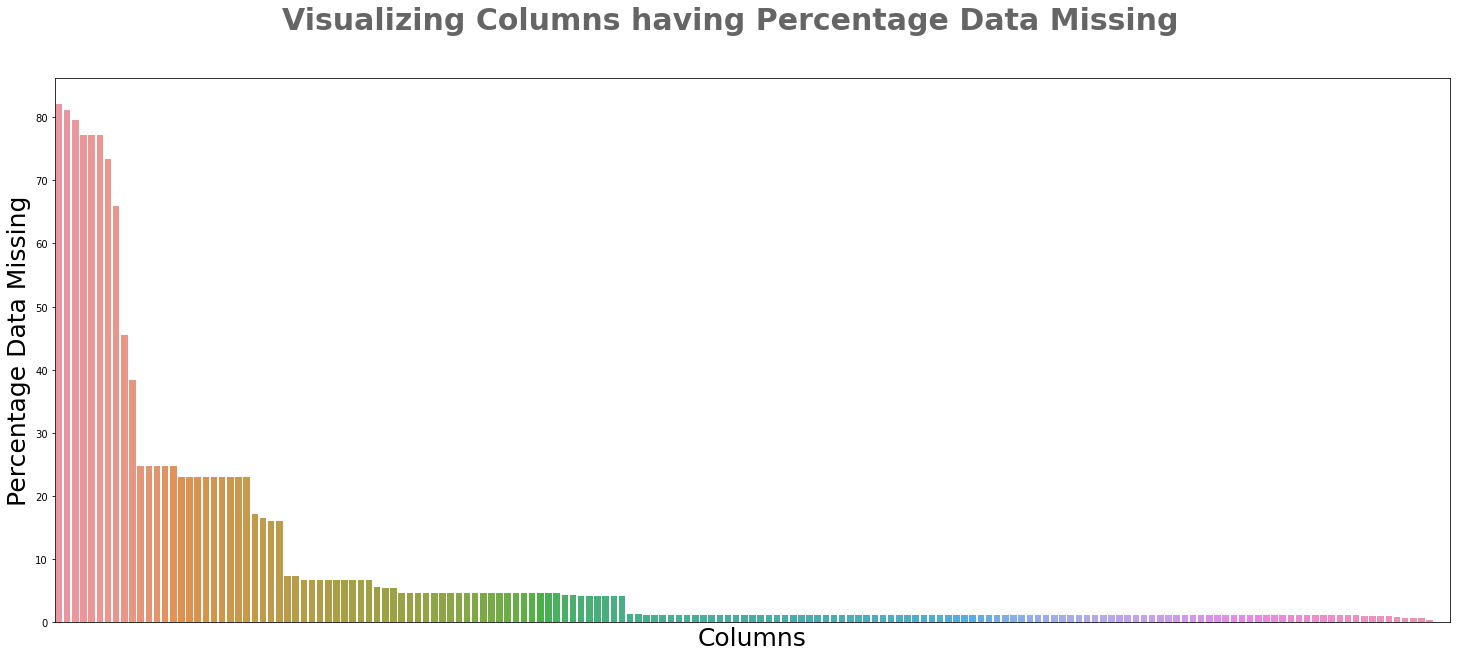

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(data=missing_value_percentage, y='percentage_missing', x='index')
plt.suptitle('Visualizing Columns having Percentage Data Missing', fontsize=30, fontweight='bold', alpha=0.6,)
plt.xticks([])
plt.ylabel('Percentage Data Missing', fontdict={'fontsize': 25})
plt.xlabel('Columns', fontdict={'fontsize': 25})
plt.show()

#### That is rediculus missing values. We have to try to remove columns having high missing values to having less data loss.

In [12]:
missing_value_percentage.head(n=15)

,index,percentage_missing
79,br_000,82.106667
78,bq_000,81.203333
77,bp_000,79.566667
76,bo_000,77.221667
2,ab_000,77.215000
113,cr_000,77.215000
75,bn_000,73.348333
74,bm_000,65.915000
73,bl_000,45.461667
72,bk_000,38.390000


#### We can see clearly, there is a huge gap between 24% to 38% in 'percentage_missing'

In [13]:
# Taking missing value percentage having more than 25%

target_missing = missing_value_percentage[missing_value_percentage['percentage_missing'] > 25]
target_missing

,index,percentage_missing
79,br_000,82.106667
78,bq_000,81.203333
77,bp_000,79.566667
76,bo_000,77.221667
2,ab_000,77.215000
113,cr_000,77.215000
75,bn_000,73.348333
74,bm_000,65.915000
73,bl_000,45.461667
72,bk_000,38.390000


In [14]:
print(f'{len(target_missing)} columns having more than 25% missing values')

10 columns having more than 25% missing values


#### Now we have to drop that columns having more than 25% missing values

In [15]:
# Filtering columns
df.drop(target_missing['index'], axis=1, inplace = True)

In [16]:
df.isnull().sum().sum()

431429

#### NaN values reduced from 850015 to 431429

### Now we have to manage the columns having empty values <=25%

### Converting possible columns data to numeric to check if having outliers

In [17]:
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)
df.dtypes

class      object
aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 161, dtype: object

### Checking outliers

In [18]:
# Get range not having outliers
def get_range(dfObj, col):
    q1 = dfObj[col].quantile(0.25)
    q3 = dfObj[col].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - (1.5*IQR)
    higher_fence = q3 + (1.5*IQR)
    return lower_fence, higher_fence
    

In [19]:
# Checking if outliers present or not
def is_outliers_present(dfObj, col):
    lower_fence, higher_fence = get_range(dfObj, col)
    return ((dfObj[col] < lower_fence) | (dfObj[col] > higher_fence)).sum() > 0

In [20]:
outliers_data = {
    True: 0,
    False: 0
}

for column in df.iloc[:,1:].columns:
    outlier_present = is_outliers_present(df, column)
    outliers_data[outlier_present] += 1

In [21]:
outliers_data

{True: 157, False: 3}

#### Most of the columns having outliers. So, we should replace 'empty values' with median of that particular column

In [22]:
# Before 'empty_value' filling total empty values
df.isnull().sum().sum()

431429

In [23]:
# Filling empty values with median
for column in df.iloc[:,1:].columns:
    df[column].fillna(df[column].median(), inplace=True)

In [24]:
# Checking if there is further any 'empty_value' or not
df.isnull().sum().sum()

0

In [25]:
df.shape

(60000, 161)

## Graphical Analysis

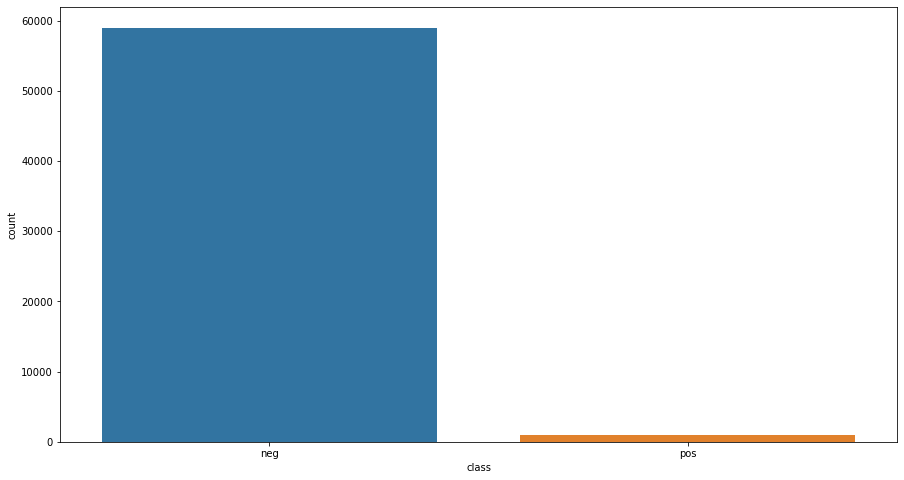

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(df['class'])
plt.show()

#### From the given data it's clear that change 'neg' class percentage is high

In [27]:
dependent_feature_frame = df['class'].value_counts(normalize=True).to_frame().reset_index()
dependent_feature_frame

,index,class
0,neg,0.983333
1,pos,0.016667


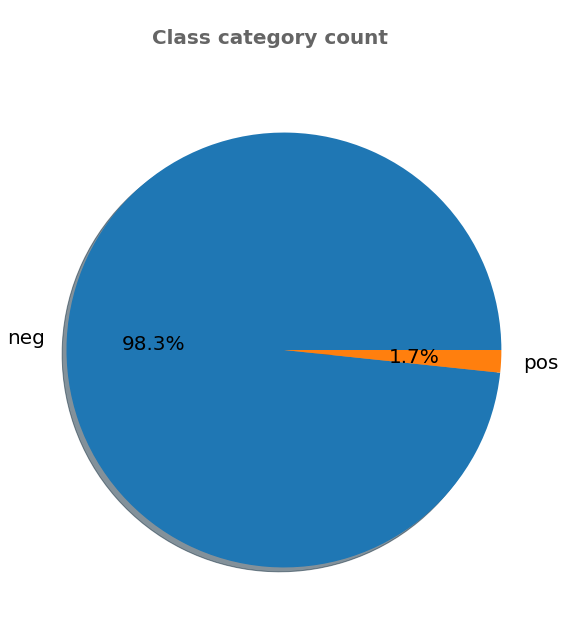

In [28]:
# Visualize Class category count
plt.figure(figsize=(15,10))
plt.suptitle('\nClass category count', fontsize=20, fontweight='bold', alpha=0.6)

plt.pie(dependent_feature_frame['class']*100, labels=list(dependent_feature_frame['index'].values), shadow=True,autopct="%1.1f%%", textprops={'fontsize':20})
plt.show()

In [29]:
## Converting categorial features to numerical value

df['class'].replace('neg', 0, inplace=True)
df['class'].replace('pos', 1, inplace=True)

## Getting independent and dependent features

In [30]:
X = df.iloc[:,1:] # Independent features
y = df['class'] # dependent feature

In [31]:
X.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Getting training and test dataset

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=250)

In [77]:
X_train.shape

(45000, 160)

In [78]:
y_train.shape

(45000,)

In [79]:
X_test.shape

(15000, 160)

In [80]:
y_test.shape

(15000,)

## Scaling Data

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

## Machine Learning

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, classification_report, f1_score, precision_score, recall_score, accuracy_score, roc_curve

In [95]:
model_collection = {
    1: LogisticRegression(),
    2: SVC(),
    3: DecisionTreeClassifier(),
    4: RandomForestClassifier(),
    5: AdaBoostClassifier(),
    6: GradientBoostingClassifier(),
    7: XGBClassifier()
}

In [96]:
model_index = list(model_collection.keys())
model_index

[1, 2, 3, 4, 5, 6, 7]

In [100]:
for index in model_index:
    curr_model = model_collection[index]    
    curr_model.fit(X_train, y_train)

    y_train_pred = curr_model.predict(X_train)
    y_test_pred = curr_model.predict(X_test)
    
    
    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)          #Calculate Accuracy
    model_train_f1 = f1_score(y_train,y_train_pred)                       #Calculate F1 Score
    model_train_precision = precision_score(y_train, y_train_pred)      # Calculate Precision Score
    model_train_recall = recall_score(y_train, y_train_pred)            # Calculate Recall Score
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)     # Calculate ROC AUC Score

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)        # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1 Score
    model_test_precision = precision_score(y_test, y_test_pred)      # Calculate Precision Score
    model_test_recall = recall_score(y_test, y_test_pred)            # Calculate Recall Score
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)     # Calculate ROC AUC Score

    print(curr_model)

    print('Model Performance for Training Set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))



    print('------------------------------------------------')

    print('Model Performance for Test Set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))



    print('='*40)
    print('\n')
    
    

LogisticRegression()
Model Performance for Training Set
- Accuracy: 0.9928
- F1: 0.7611
- Precision: 0.8515
- Recall: 0.6880
- ROC AUC Score: 0.8430
------------------------------------------------
Model Performance for Test Set
- Accuracy: 0.9907
- F1: 0.9900
- Precision: 0.7895
- Recall: 0.6000
- ROC AUC Score: 0.7986


SVC()
Model Performance for Training Set
- Accuracy: 0.9976
- F1: 0.9211
- Precision: 0.9969
- Recall: 0.8560
- ROC AUC Score: 0.9280
------------------------------------------------
Model Performance for Test Set
- Accuracy: 0.9876
- F1: 0.9843
- Precision: 0.9324
- Recall: 0.2760
- ROC AUC Score: 0.6378


DecisionTreeClassifier()
Model Performance for Training Set
- Accuracy: 1.0000
- F1: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
------------------------------------------------
Model Performance for Test Set
- Accuracy: 0.9903
- F1: 0.9902
- Precision: 0.7114
- Recall: 0.7000
- ROC AUC Score: 0.8476


RandomForestClassifier()
Model Performa

### 👉 Observation: From the roc auc score perspective, we can call that for most of the models are overfitted as the value of this with training data is quite high but that value with test data is significantly low.

## We will try to get best possible model with the help of HyperParameter Tuning

In [101]:
from sklearn.model_selection import RandomizedSearchCV

## HyperParameter Tuning with SVC

In [102]:
params = {
    'kernel': ['rbf', 'linear', 'sigmoid']
}

In [103]:
tuned_svc_model = RandomizedSearchCV(estimator=SVC(), param_distributions=params, n_jobs=-1, verbose=1, cv=3)

In [104]:
tuned_svc_model.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'kernel': ['rbf', 'linear', 'sigmoid']},
                   verbose=1)

In [105]:
tuned_svc_model.best_params_

{'kernel': 'linear'}

In [106]:
tuned_svc_model.best_score_

0.9913555555555557

In [140]:
svc_tuned = SVC(kernel='linear')

In [141]:
svc_tuned.fit(X_train, y_train)

SVC(kernel='linear')

In [142]:
tuned_y_pred_svc = svc_tuned.predict(X_test)

In [143]:
model_test_accuracy = accuracy_score(y_test, tuned_y_pred_svc)        # Calculate Accuracy
model_test_f1 = f1_score(y_test, tuned_y_pred_svc, average='weighted')  # Calculate F1 Score
model_test_precision = precision_score(y_test, tuned_y_pred_svc)      # Calculate Precision Score
model_test_recall = recall_score(y_test, tuned_y_pred_svc)            # Calculate Recall Score
model_test_rocauc_score = roc_auc_score(y_test, tuned_y_pred_svc)     # Calculate ROC AUC Score

In [144]:
print('Model Performance for Test Set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print("- F1: {:.4f}".format(model_test_f1))
print("- Precision: {:.4f}".format(model_test_precision))
print("- Recall: {:.4f}".format(model_test_recall))
print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

Model Performance for Test Set
- Accuracy: 0.9916
- F1: 0.9910
- Precision: 0.8370
- Recall: 0.6160
- ROC AUC Score: 0.8070


#### Observation
- ROC AUC Score increased from 63.78% to 80.70%

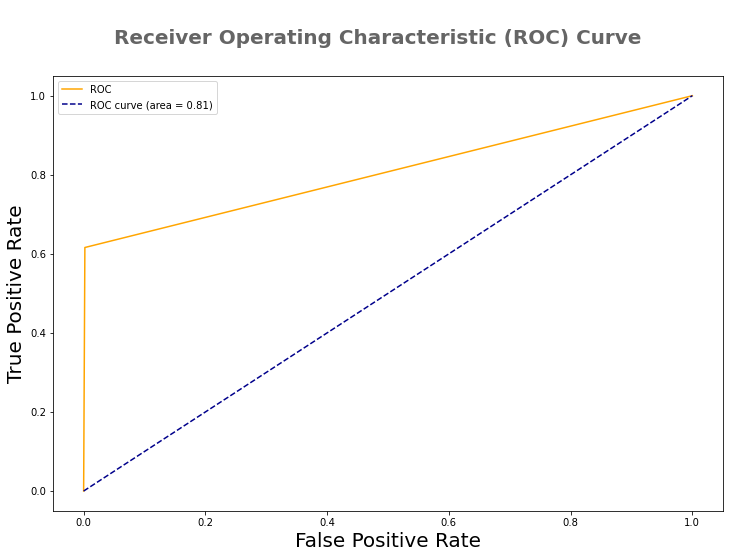

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, tuned_y_pred_svc)
auc = model_test_rocauc_score # Getting 'roc_auc_score' of 'rbf_trained_model'

plt.figure(figsize=(12,8))

plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20, fontweight='bold', alpha=0.6, y=1.)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)

plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})

plt.legend()
plt.show()

## HyperParameter Tuning with DecisionTreeClassifier

In [116]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [4,6,10,13,18],
    'min_samples_leaf': [3,5,7,9,12],
}

In [117]:
tuned_dt_model = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params_dt, n_jobs=-1, verbose=1, cv=3)

In [118]:
tuned_dt_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [3, 5, 7, 9, 12],
                                        'min_samples_split': [4, 6, 10, 13,
                                                              18]},
                   verbose=1)

In [123]:
tuned_dt_model.best_params_

{'min_samples_split': 13, 'min_samples_leaf': 9, 'criterion': 'gini'}

In [145]:
dt_tuned = DecisionTreeClassifier(min_samples_split=13, min_samples_leaf=9, criterion='gini')

In [146]:
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=9, min_samples_split=13)

In [147]:
y_pred_dt_tuned=dt_tuned.predict(X_test)

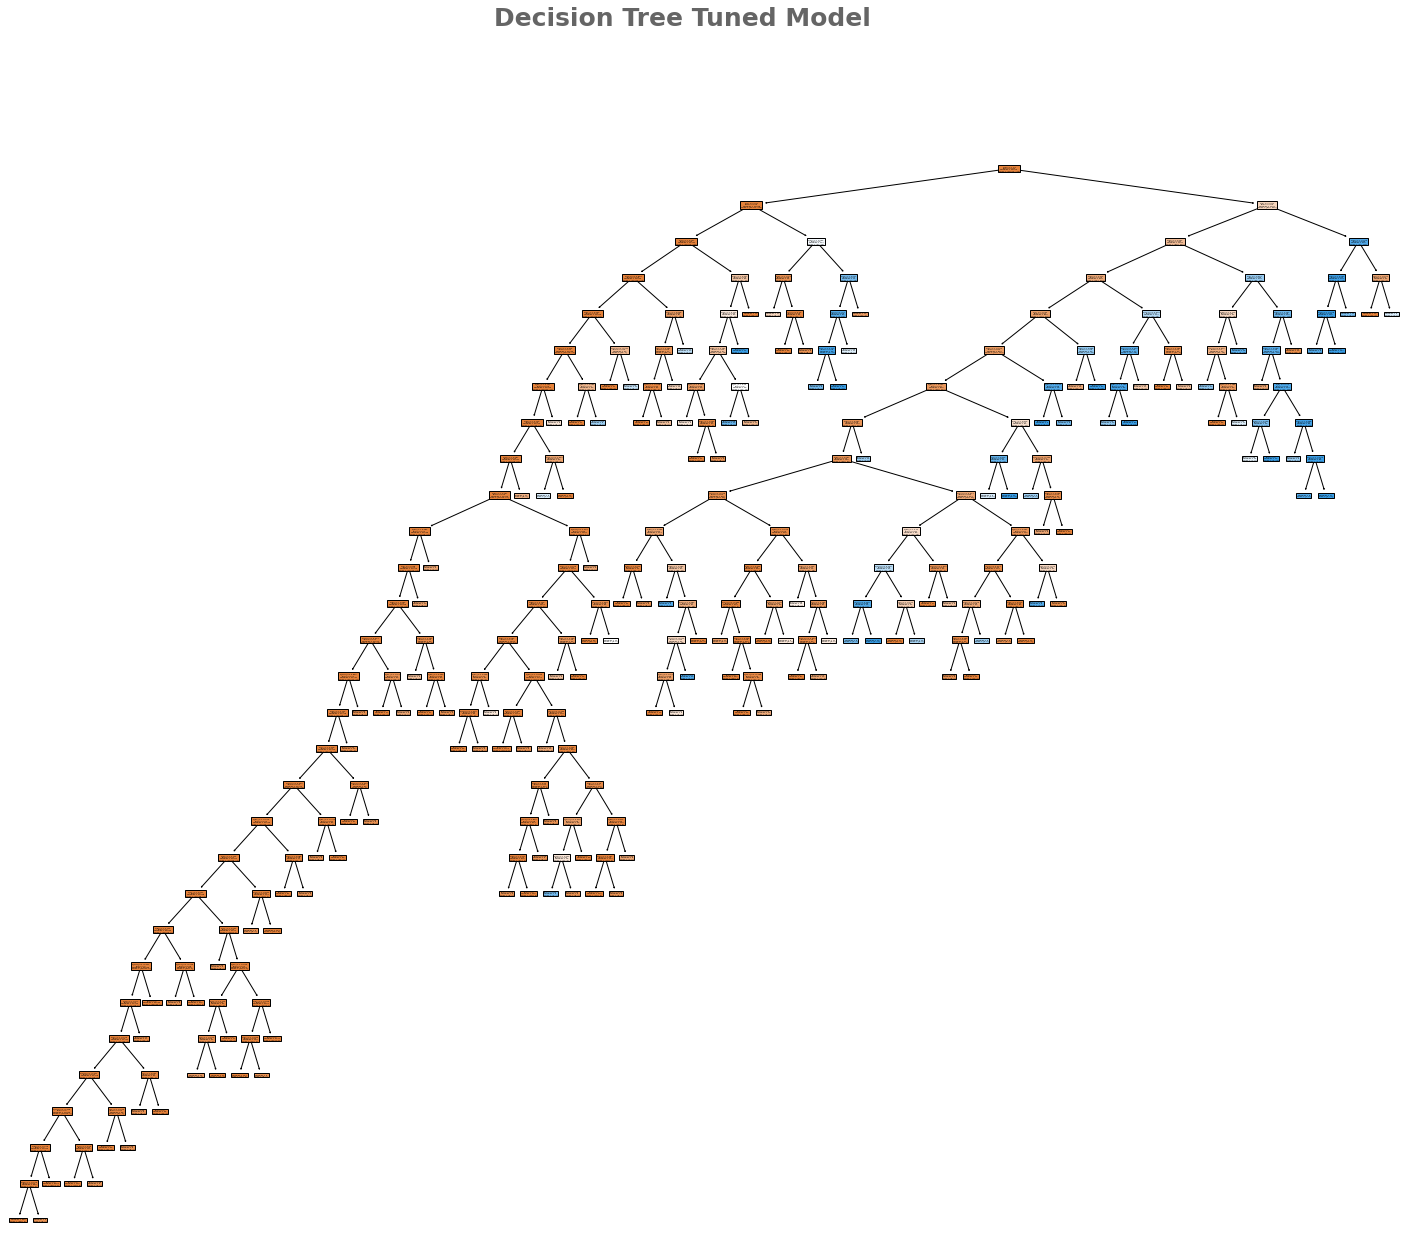

In [152]:
from sklearn import tree
moderate_fig = plt.figure(figsize=(25,20))
plt.suptitle('Decision Tree Tuned Model', fontsize=25, fontweight='bold', alpha=0.6)
tree.plot_tree(dt_tuned, filled=True)
plt.show()

In [148]:
model_test_accuracy = accuracy_score(y_test, y_pred_dt_tuned)        # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_pred_dt_tuned, average='weighted')  # Calculate F1 Score
model_test_precision = precision_score(y_test, y_pred_dt_tuned)      # Calculate Precision Score
model_test_recall = recall_score(y_test, y_pred_dt_tuned)            # Calculate Recall Score
model_test_rocauc_score = roc_auc_score(y_test, y_pred_dt_tuned)     # Calculate ROC AUC Score

In [149]:
print('Model Performance for Test Set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print("- F1: {:.4f}".format(model_test_f1))
print("- Precision: {:.4f}".format(model_test_precision))
print("- Recall: {:.4f}".format(model_test_recall))
print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

Model Performance for Test Set
- Accuracy: 0.9909
- F1: 0.9907
- Precision: 0.7522
- Recall: 0.6800
- ROC AUC Score: 0.8381


#### Observation:
- ROC AUC Score reduced from 84.76% to 83.81%
- May be we not get the best tuned model 😞

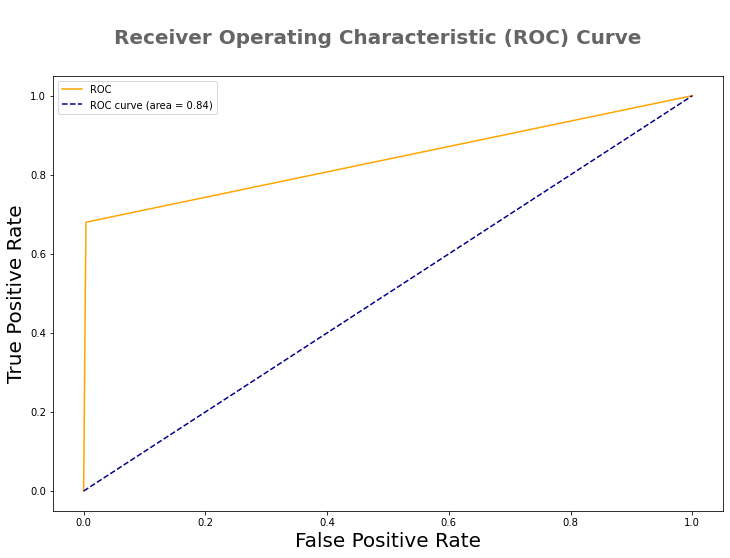

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_tuned)
auc = model_test_rocauc_score # Getting 'roc_auc_score' of 'rbf_trained_model'

plt.figure(figsize=(12,8))

plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20, fontweight='bold', alpha=0.6, y=1.)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)

plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})

plt.legend()
plt.show()

## HyperParameter Tuning with RandomForestClassifier

In [154]:
params_rand = {
    'n_estimators': [90,100,115],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6,10,18,25],
    'min_samples_split': [2,5,9,14,19],
    'min_samples_leaf': [4,8,13],
}

In [157]:
tuned_rf_model = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params_rand, n_jobs=-1, verbose=1, cv=4)

In [158]:
tuned_rf_model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 6, 10, 18, 25],
                                        'min_samples_leaf': [4, 8, 13],
                                        'min_samples_split': [2, 5, 9, 14, 19],
                                        'n_estimators': [90, 100, 115]},
                   verbose=1)

In [159]:
tuned_rf_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_depth': 25,
 'criterion': 'entropy'}

In [160]:
tuned_rf_model.best_score_

0.9924666666666667

In [161]:
model_rf_tuned = RandomForestClassifier(n_estimators=100, min_samples_leaf=4, min_samples_split=14, max_depth=25, criterion='entropy')

In [162]:
model_rf_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=4,
                       min_samples_split=14)

In [166]:
y_pred_rf_tuned=model_rf_tuned.predict(X_test)

In [167]:
model_test_accuracy = accuracy_score(y_test, y_pred_rf_tuned)        # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_pred_rf_tuned, average='weighted')  # Calculate F1 Score
model_test_precision = precision_score(y_test, y_pred_rf_tuned)      # Calculate Precision Score
model_test_recall = recall_score(y_test, y_pred_rf_tuned)            # Calculate Recall Score
model_test_rocauc_score = roc_auc_score(y_test, y_pred_rf_tuned)     # Calculate ROC AUC Score

In [168]:
print('Model Performance for Test Set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print("- F1: {:.4f}".format(model_test_f1))
print("- Precision: {:.4f}".format(model_test_precision))
print("- Recall: {:.4f}".format(model_test_recall))
print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

Model Performance for Test Set
- Accuracy: 0.9923
- F1: 0.9915
- Precision: 0.8941
- Recall: 0.6080
- ROC AUC Score: 0.8034


#### Observation:
- ROC AUC Score reduced from 82.54% to 80.34%
- May be we not get the best tuned model 😞

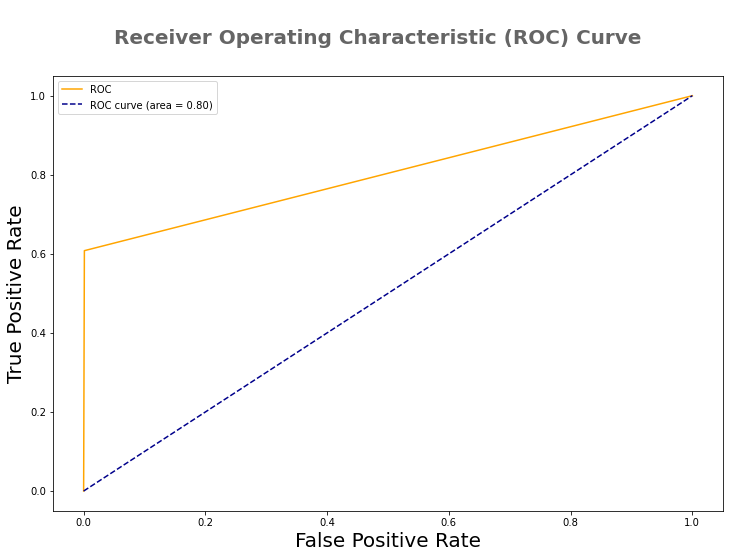

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tuned)
auc = model_test_rocauc_score # Getting 'roc_auc_score' of 'rbf_trained_model'

plt.figure(figsize=(12,8))

plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20, fontweight='bold', alpha=0.6, y=1.)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)

plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})

plt.legend()
plt.show()

## HyperParameter Tuning with AdaBoostClassifier

In [173]:
params_adaboost = {
    'n_estimators': [75,90,100],
    'learning_rate': [0.01,0.0001,0.001],
}

In [174]:
tuned_adaboost_model=RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=params_adaboost, verbose=1, cv=5, n_jobs=-1)

In [175]:
tuned_adaboost_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.0001, 0.001],
                                        'n_estimators': [75, 90, 100]},
                   verbose=1)

In [176]:
tuned_adaboost_model.best_params_

{'n_estimators': 75, 'learning_rate': 0.01}

In [178]:
tuned_adaboost_model.best_score_

0.9833333333333332

In [179]:
ada_tuned_model=AdaBoostClassifier(n_estimators=75, learning_rate=0.01)

In [180]:
ada_tuned_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=75)

In [182]:
y_pred_ada_tuned=ada_tuned_model.predict(X_test)

In [183]:
model_test_accuracy = accuracy_score(y_test, y_pred_ada_tuned)        # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_pred_ada_tuned, average='weighted')  # Calculate F1 Score
model_test_precision = precision_score(y_test, y_pred_ada_tuned)      # Calculate Precision Score
model_test_recall = recall_score(y_test, y_pred_ada_tuned)            # Calculate Recall Score
model_test_rocauc_score_ada = roc_auc_score(y_test, y_pred_ada_tuned)     # Calculate ROC AUC Score

In [184]:
print('Model Performance for Test Set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print("- F1: {:.4f}".format(model_test_f1))
print("- Precision: {:.4f}".format(model_test_precision))
print("- Recall: {:.4f}".format(model_test_recall))
print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

Model Performance for Test Set
- Accuracy: 0.9833
- F1: 0.9751
- Precision: 0.0000
- Recall: 0.0000
- ROC AUC Score: 0.8034


#### Observation:
- ROC AUC Score found near about raw model prediction

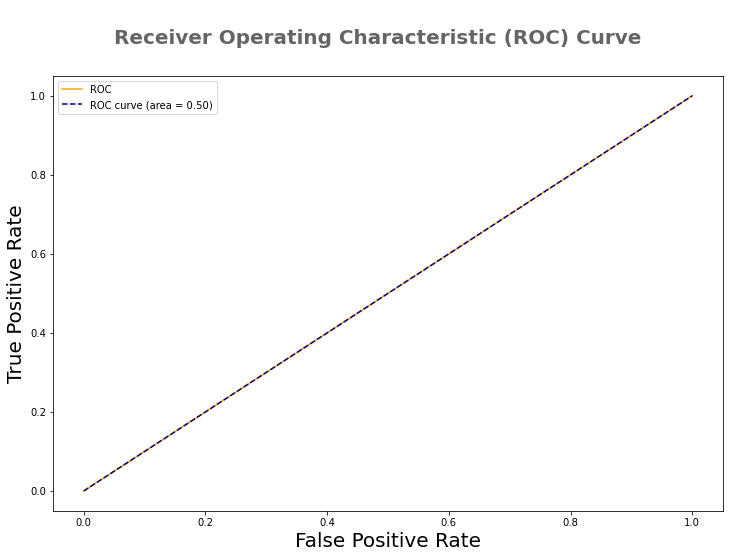

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada_tuned)
auc = model_test_rocauc_score_ada # Getting 'roc_auc_score' of 'rbf_trained_model'

plt.figure(figsize=(12,8))

plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20, fontweight='bold', alpha=0.6, y=1.)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)

plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})

plt.legend()
plt.show()

## HyperParameter Tuning with GradientBoostingClassifier

In [191]:
params_grad = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001,0.0001],
    'n_estimators': [100,115],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [4,7,10,13],
    'min_samples_leaf': [5,9,12,15],
    'max_depth': [2,6,15,25],
}

In [192]:
tuned_grad_model=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=params_grad, cv=3, verbose=1, n_jobs=-1)

In [ ]:
tuned_grad_model.fit(X_train, y_train)